In [1]:
import pickle
from matplotlib import pyplot as plt
import os

In [2]:
root_path_to_pickles = "./"
number_of_images = 2

In [3]:
# available pickles are:
[f for f in os.listdir(root_path_to_pickles) if f.endswith(".pkl")]

['times_methods.pkl', 'times_metrics.pkl', 'times_metrics_aggregated.pkl']

## Plot method times - for all images

In [4]:
with open(root_path_to_pickles + "times_methods.pkl", 'rb') as f:
    times_methods = pickle.load(f)

In [11]:
# sample json structure
times_methods = {
    'kernel_shap': 13.953,
    'integrated_gradients': 14.91,
    'grad_cam': 0.323,
    'saliency': 0.747
}

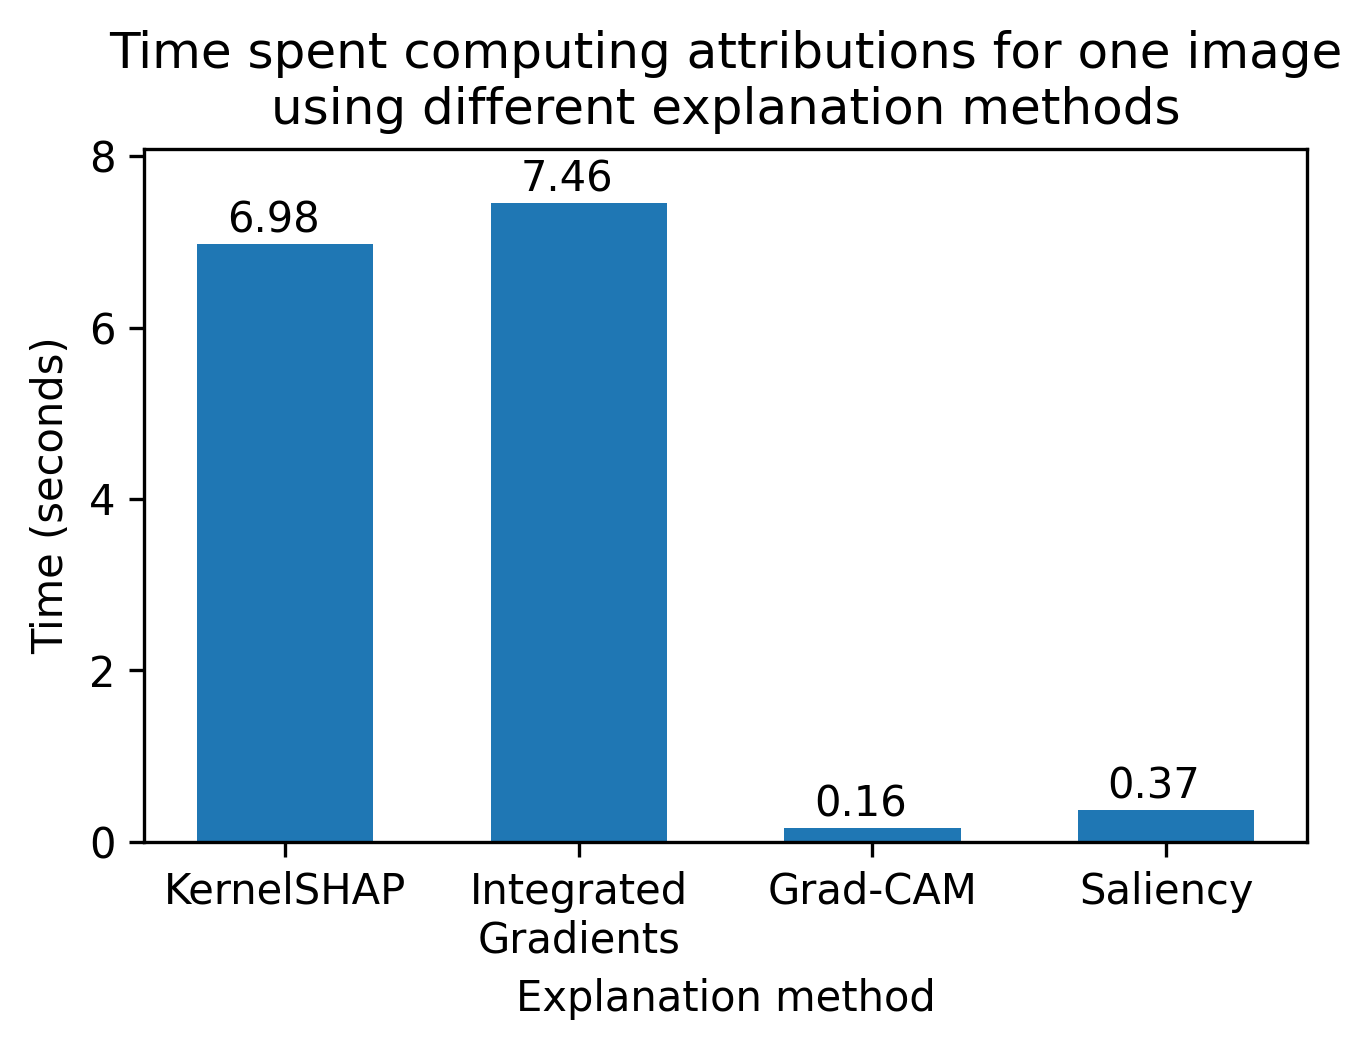

In [12]:
keys = list(times_methods.keys())
mapped_keys = {
    'kernel_shap': "KernelSHAP",
    'integrated_gradients': "Integrated\nGradients",
    'grad_cam': "Grad-CAM",
    'saliency': "Saliency"
}

fig = plt.figure(figsize=(5, 3), dpi=300)
ax = fig.add_subplot(111)
ax.set_title("Time spent computing attributions for one image\nusing different explanation methods")
ax.set_ylabel("Time (seconds)")
ax.set_xlabel("Explanation method")
ax.bar([mapped_keys[k] for k in keys], [times_methods[k] / number_of_images for k in keys], width=0.6)
y_scale_max = max(times_methods.values()) * 1.085 / number_of_images
ax.set_ylim(0, y_scale_max)
# add text labels
for i, v in enumerate([times_methods[k] / number_of_images for k in keys]):
    ax.text(i - 0.2, v + y_scale_max * 0.016, str(round(v, 2)), color='black')
fig.savefig("times_methods.png", bbox_inches='tight')

## Plot method times - for all images

In [13]:
with open(root_path_to_pickles + "times_metrics_aggregated.pkl", 'rb') as f:
    times_metrics_aggregated = pickle.load(f)    

In [16]:
# sample json structure
times_metrics_aggregated = {
    'faithfulness_estimate': 337.2,
    'average_sensitivity': 218.5,
    'irof': 103.2,
    'sparseness': 14.7
}

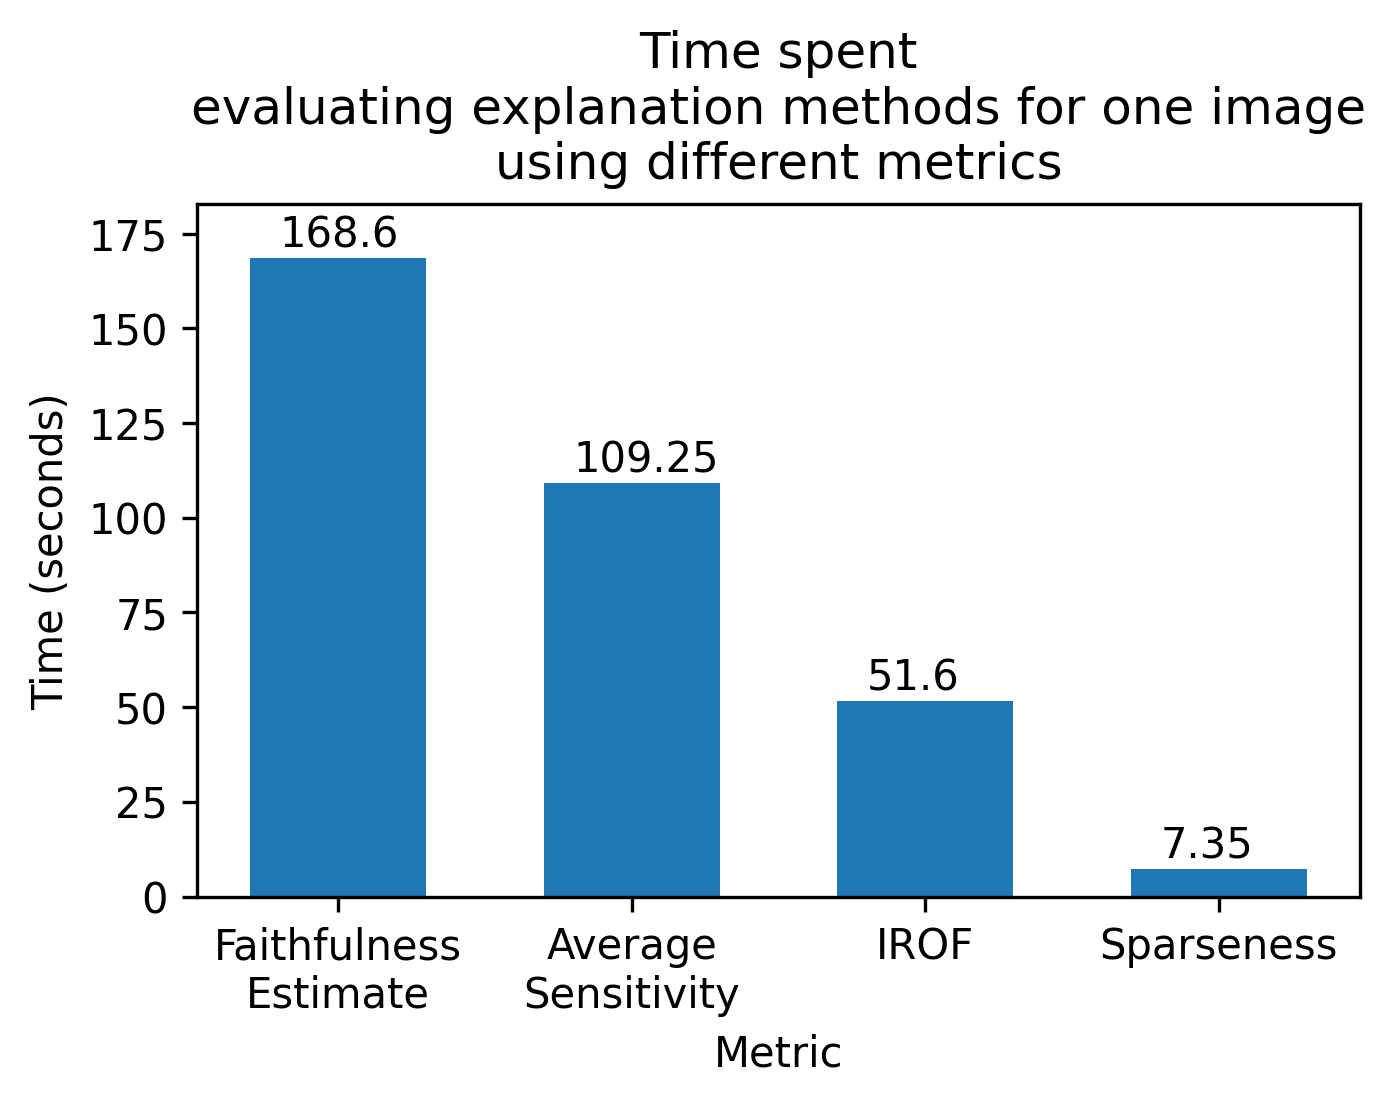

In [17]:
keys = list(times_metrics_aggregated.keys())
mapped_keys = {
    'faithfulness_estimate' : "Faithfulness\nEstimate",
    'average_sensitivity' : "Average\nSensitivity",
    'irof' : "IROF",
    'sparseness' : "Sparseness"
}

fig = plt.figure(figsize=(5, 3), dpi=300)
ax = fig.add_subplot(111)
ax.set_title("Time spent\nevaluating explanation methods for one image\nusing different metrics")
ax.set_ylabel("Time (seconds)")
ax.set_xlabel("Metric")
ax.bar([mapped_keys[k] for k in keys], [times_metrics_aggregated[k] / number_of_images for k in keys], width=0.6)
y_scale_max = max(times_metrics_aggregated.values()) * 1.085 / number_of_images
ax.set_ylim(0, y_scale_max)
# add text labels
for i, v in enumerate([times_metrics_aggregated[k] / number_of_images for k in keys]):
    ax.text(i - 0.2, v + y_scale_max * 0.016, str(round(v, 2)), color='black')
fig.savefig("times_metrics_aggregated.png", bbox_inches='tight')

## Plot method times - boxplot

In [18]:
with open(root_path_to_pickles + "times_metrics.pkl", 'rb') as f:
    times_metrics = pickle.load(f)


In [19]:
times_metrics = {
    'faithfulness_estimate': {
        'kernel_shap': 98.7,
        'integrated_gradients': 90.4,
        'grad_cam': 77.6,
        'saliency': 70.5},
    'average_sensitivity': {
        'kernel_shap': 72.9,
        'integrated_gradients': 120.0,
        'grad_cam': 9.4,
        'saliency': 16.2},
    'irof': {
        'kernel_shap': 26.0,
        'integrated_gradients': 30.8,
        'grad_cam': 23.0,
        'saliency': 23.4},
    'sparseness': {
        'kernel_shap': 4.6,
        'integrated_gradients': 8.7,
        'grad_cam': 0.4,
        'saliency': 1.0}
}

In [20]:
import pandas as pd
df = pd.DataFrame(times_metrics)
df = df/number_of_images

,kernel_shap,integrated_gradients,grad_cam,saliency
faithfulness_estimate,49.35,45.20,38.8,35.25
average_sensitivity,36.45,60.00,4.7,8.10
irof,13.00,15.40,11.5,11.70
sparseness,2.30,4.35,0.2,0.50


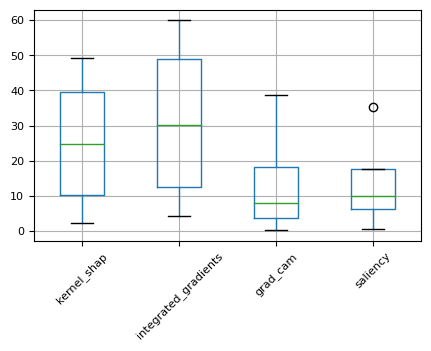

In [21]:
df.T.boxplot(figsize=(5, 3), rot=45, fontsize=8)
df.T

,faithfulness_estimate,average_sensitivity,irof,sparseness
kernel_shap,49.35,36.45,13.0,2.30
integrated_gradients,45.20,60.00,15.4,4.35
grad_cam,38.80,4.70,11.5,0.20
saliency,35.25,8.10,11.7,0.50


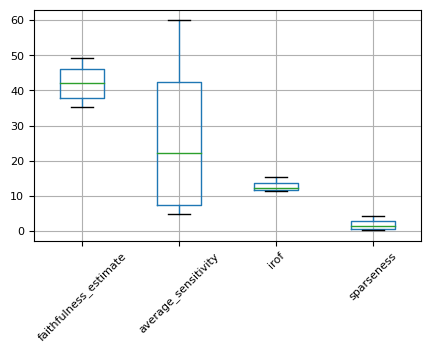

In [22]:
df.boxplot(figsize=(5, 3), rot=45, fontsize=8)
df

<AxesSubplot:>

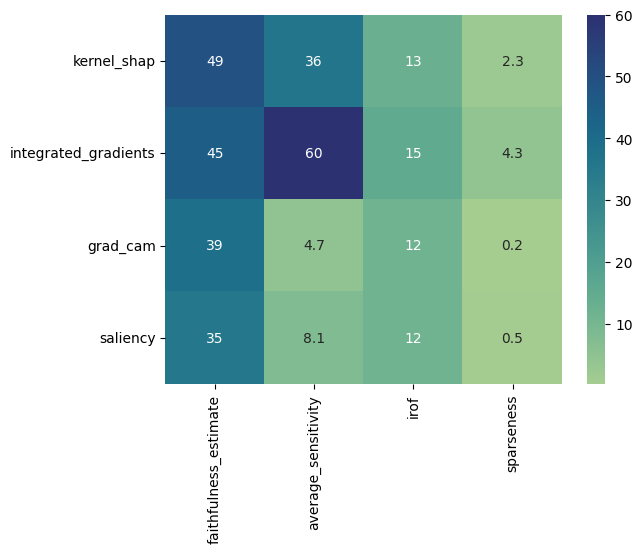

In [23]:
import seaborn as sns
sns.heatmap(df, annot=True, cmap="crest")